# Streaming Sentinel 2 Data

This is an example of using a library to access a very large dataset and only download the parts that are needed.

In this case only a small part of the whole [Sentinel 2](https://en.wikipedia.org/wiki/Sentinel-2) dataset is fetched on demand.

Most of the code in this notebook deals with processing the data so that it can be plotted for human consumption.

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import math

import numpy as np

from rio_tiler import sentinel2
from skimage import exposure

In [4]:
def deg2num(lat_deg, lon_deg, zoom):
    lat_rad = math.radians(lat_deg)
    n = 2.0 ** zoom
    xtile = int((lon_deg + 180.0) / 360.0 * n)
    ytile = int((1.0 - math.log(math.tan(lat_rad) + (1 / math.cos(lat_rad))) / math.pi) / 2.0 * n)
    return (xtile, ytile)


def centroid(bounds):
    bounds = bounds['bounds']
    lat = (bounds[1] + bounds[3]) / 2
    lng = (bounds[0] + bounds[2]) / 2
    return lat, lng


scene_id = 'S2A_tile_20171103_32TMT_0'
bounds = sentinel2.bounds(scene_id)

z = 12
x, y = deg2num(*centroid(bounds), z)

# This call fetches the data
tile = sentinel2.tile(scene_id, x, y, z, tilesize=512)
# Move the colour dimension to the last axis
tile = np.transpose(tile, (1, 2, 0))

# Rescale the intensity to make a pretty picture for human eyes
low, high = np.percentile(tile, (1, 97))
tile = exposure.rescale_intensity(tile, in_range=(low, high))

/srv/conda/lib/python3.6/site-packages/rasterio/windows.py:483: RasterioDeprecationWarning: use 'width' attribute instead
  RasterioDeprecationWarning)
/srv/conda/lib/python3.6/site-packages/rio_tiler/utils.py:136: RasterioDeprecationWarning: use 'height' attribute instead
  indexes=indexes)


In [5]:
# The tile only shows a subset of the whole image, which is several GB large
tile.shape

(512, 512, 3)

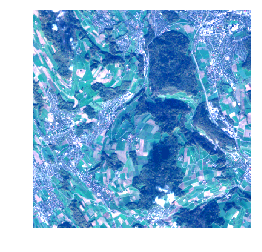

In [6]:
plt.imshow(tile)
plt.axis("off");